In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [ ]:
tel_dt = pd.read_csv("/content/drive/My Drive/telecom_users.csv")
tel_dt.shape

(5986, 22)

In [ ]:
tel_dt.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
tel_dt.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There isn't any missing value

In [ ]:
tel_dt[tel_dt.duplicated()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


there isn't any duplicated value

In [ ]:
tel_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


type of "SeniorCitizen" should be changed,

"Unnamed: 0" & "customerID" should be deleted

 type of "TotalCharges" should be changed

In [ ]:
tel_dt.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)
tel_dt['TotalCharges'] = tel_dt['TotalCharges'].apply(pd.to_numeric , errors='coerce')
tel_dt['SeniorCitizen']= tel_dt['SeniorCitizen'].astype('object')
tel_dt.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


In [ ]:
tel_dt[tel_dt['Churn']=='Yes'][['tenure','MonthlyCharges','TotalCharges']].describe().T


,count,mean,std,min,25%,50%,75%,max
tenure,1587.0,18.246377,19.667262,1.00,2.000,10.0,30.000,72.00
MonthlyCharges,1587.0,74.164871,24.965002,18.85,55.675,79.5,94.400,118.35
TotalCharges,1587.0,1550.701985,1905.709839,18.85,131.925,706.6,2366.775,8684.80


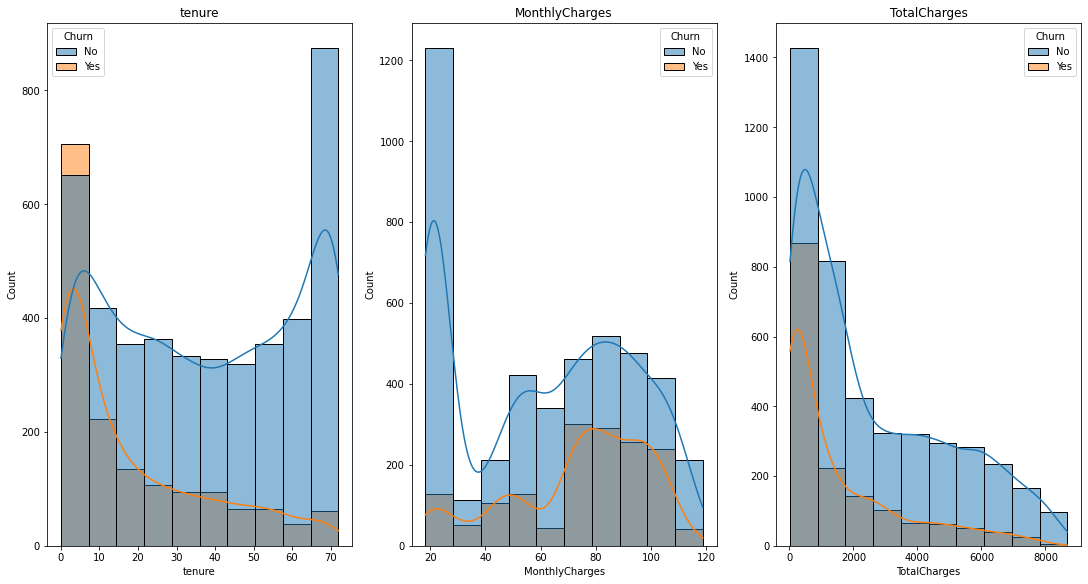

In [ ]:
df1=tel_dt[['tenure','MonthlyCharges','TotalCharges']]
colfloat=df1.columns
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
for c,i in enumerate(colfloat):
    sns.histplot(data=tel_dt, x=i, ax=ax[c], bins=10, hue='Churn', kde=True)
    ax[c].set_title(i)

if we closely observe the Monthly charges mean of 74.16 and median of 79.5 for customers who are churned

if we compare with the Monthly charges mean of 61.42 and median of 64.75 for customers who are not churned

we can see that monthly charges of churned customers are higher than the customers who not churn

In [ ]:
tel_dt["Churn"][tel_dt["Churn"]=="Yes"].groupby(by=tel_dt['InternetService']).size()

InternetService
DSL             397
Fiber optic    1091
No               99
Name: Churn, dtype: int64

In [ ]:
filt=tel_dt['InternetService']
churn=tel_dt['Churn']
DSL= tel_dt[filt=='DSL']
Fiber_optic = tel_dt[filt=='Fiber optic']
No_Internet = tel_dt[filt=='No']
Fiber_left =Fiber_optic[churn=='Yes']
DSL_left =DSL[churn=='Yes'] 
No_Internet_left =No_Internet[churn=='Yes'] 
Fiber_keep=Fiber_optic[churn=='No']
DSL_keep =DSL[churn=='No']
No_Internet_keep =No_Internet[churn=='No']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:

labels= ['Fiber_left', 'DSL_left', 'No_Internet_left', 'Fiber_keep','DSL_keep','No_Internet_keep']
values=[len(Fiber_left), len(DSL_left),len(No_Internet_left),len(Fiber_keep),len(DSL_keep),len(No_Internet_keep)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on InternetService - Churn")
fig.show()

In [ ]:
tel_dt["Churn"][tel_dt["Churn"]=="Yes"].groupby(by=tel_dt['PaymentMethod']).size()

PaymentMethod
Bank transfer (automatic)    224
Credit card (automatic)      198
Electronic check             902
Mailed check                 263
Name: Churn, dtype: int64

In [ ]:
filt1=tel_dt['PaymentMethod']
Bank_transfer= tel_dt[filt1=='Bank transfer (automatic)']
Credit_card = tel_dt[filt1=='Credit card (automatic)']
Electronic_check = tel_dt[filt1=='Electronic check']
Mailed_check= tel_dt[filt1=='Mailed check']
Bank_transfer_left =Bank_transfer[churn=='Yes']
Credit_card_left =Credit_card[churn=='Yes'] 
Electronic_check_left =Electronic_check[churn=='Yes']
Mailed_check_left= Mailed_check[churn=='Yes']
Bank_transfer_keep=Bank_transfer[churn=='No']
Credit_card_keep =Credit_card[churn=='No']
Electronic_check_keep =Electronic_check[churn=='No']
Mailed_check_keep= Mailed_check[churn=='No']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

In [ ]:
labels= ['Bank_transfer_left', 'Credit_card_left', 'Electronic_check_left', 'Mailed_check_left','Bank_transfer_keep','Credit_card_keep','Electronic_check_keep','Mailed_check_keep']
values=[len(Bank_transfer_left), len(Credit_card_left),len(Electronic_check_left),len(Mailed_check_left),len(Bank_transfer_keep),len(Credit_card_keep),len(Electronic_check_keep),len(Mailed_check_keep)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis of PaymentMethod on Churn distribution")
fig.show()